1. train.csv : 학습 데이터
date: 날짜
precipitation: 강수량(mm)
temp_mean: 평균 기온(℃)
temp_highest: 최고 기온(℃)
temp_lowest: 최저 기온(℃)
PM10: 미세먼지(㎍/㎥)
PM2.5: 초미세먼지(㎍/㎥)
humidity: 습도(%rh)
sunshine_sum: 일조합
sunshine_rate: 일조율
wind_mean: 평균 풍속(m/s)
wind_max: 최대 풍속(m/s)
rentals : 따릉이 대여량


2. test.csv : 테스트 데이터
date: 날짜
precipitation: 강수량(mm)
temp_mean: 평균 기온(℃)
temp_highest: 최고 기온(℃)
temp_lowest: 최저 기온(℃)
PM10: 미세먼지(㎍/㎥)
PM2.5: 초미세먼지(㎍/㎥)
humidity: 습도(%rh)
sunshine_sum: 일조합
sunshine_rate: 일조율
wind_mean: 평균 풍속(m/s)
wind_max: 최대 풍속(m/s)


3. sample_submissoin.csv : 제출 양식
date: 날짜
rentals: 따릉이 대여량(예측값)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")  
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


In [4]:
train.isnull().sum()

date               0
precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
dtype: int64

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precipitation,417.0,9.169544,17.938958,0.0,0.000,1.3,8.70,103.1
temp_mean,1095.0,13.279726,10.470287,-14.8,4.600,13.8,22.60,33.7
temp_highest,1095.0,18.131507,10.564244,-10.7,9.150,19.6,27.05,39.6
temp_lowest,1095.0,9.181918,10.644636,-17.8,0.400,9.0,18.85,30.3
PM10,1028.0,36.051556,20.001564,5.0,23.000,32.0,45.00,171.0
PM2.5,1027.0,21.532619,13.628947,2.0,12.000,19.0,27.00,124.0
humidity,1095.0,59.166301,15.679415,17.9,47.600,58.8,69.50,97.0
sunshine_sum,1090.0,6.776697,3.975086,0.0,3.225,8.0,9.70,13.6
sunshine_rate,1095.0,56.263288,32.828707,0.0,25.700,66.7,86.40,95.9
wind_mean,1095.0,2.013607,0.679100,0.6,1.600,1.9,2.40,4.8


In [6]:
test

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max
0,2021-01-01,NaN,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1
1,2021-01-02,NaN,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4
2,2021-01-03,NaN,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5
3,2021-01-04,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2
4,2021-01-05,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1
361,2021-12-28,NaN,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1
362,2021-12-29,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9
363,2021-12-30,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6


In [7]:
# train의 date 파싱
train_year = []
train_month = []
train_day = [] 

for date in train["date"] :
    train_y = date.split('-')[0]
    train_m = date.split('-')[1]
    train_d = date.split('-')[2]
    
    train_year.append(train_y)
    train_month.append(train_m)
    train_day.append(train_d)

train["year"] = train_year 
train["month"] = train_month 
train["day"] = train_day

# train의 결측치(강수량, 미세먼지, 일조합) 처리
# train["precipitation"] = train["precipitation"].replace(np.nan, 0)
train["precipitation"] = train["precipitation"].fillna(0)
train["PM10"] = train["PM10"].fillna(train["PM10"].mean())
train["PM2.5"] = train["PM2.5"].fillna(train["PM2.5"].mean())
train["sunshine_sum"] = train["sunshine_sum"].fillna(train["sunshine_sum"].mean())

train.isnull().sum()

date             0
precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
rental           0
year             0
month            0
day              0
dtype: int64

In [8]:
train.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,01,01
1,2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,01,02
2,2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,01,03
3,2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,01,04
4,2018-01-05,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,01,05


In [9]:
train['temp_diff_info'] = train['temp_highest'] - train['temp_lowest']

In [10]:
test['temp_diff_info'] = test['temp_highest'] - test['temp_lowest']

In [11]:
train['sweat_info'] =  train['temp_highest'] * train['humidity']
train['sweat_info2'] = train['temp_lowest'] * train['humidity']

In [12]:
test['sweat_info'] =  test['temp_highest'] * test['humidity']
test['sweat_info2'] = test['temp_lowest'] * test['humidity']

In [13]:
train

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,temp_diff_info,sweat_info,sweat_info2
0,2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,01,01,8.9,148.58,-199.41
1,2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,01,02,6.1,75.60,-180.60
2,2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,01,03,6.7,-16.92,-300.33
3,2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,01,04,8.0,-30.10,-374.10
4,2018-01-05,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,01,05,7.2,77.44,-271.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27,8.6,629.00,88.06
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28,7.2,821.94,302.82
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29,10.5,304.44,-438.96
1093,2020-12-30,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30,6.7,-344.10,-715.95


In [14]:
test

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,temp_diff_info,sweat_info,sweat_info2
0,2021-01-01,NaN,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,11.4,102.40,-627.20
1,2021-01-02,NaN,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,7.0,-53.90,-323.40
2,2021-01-03,NaN,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,7.1,-90.00,-409.50
3,2021-01-04,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,8.7,15.42,-431.76
4,2021-01-05,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,7.8,-110.88,-522.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,9.0,-237.51,-785.61
361,2021-12-28,NaN,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,7.6,-66.42,-627.30
362,2021-12-29,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,9.7,430.11,-277.02
363,2021-12-30,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,7.0,9.70,-329.80


In [15]:
# test의 date 파싱

test_year =[] 
test_month = []
test_day= [] 

for date in test["date"]:
    test_y = date.split("-")[0]
    test_m = date.split("-")[1]
    test_d = date.split("-")[2]

    test_year.append(test_y)
    test_month.append(test_m)
    test_day.append(test_d)

test["year"] = test_year
test["month"] = test_month
test["day"] = test_day

# test의 결측치(강수량, 미세먼지, 일조합) 처리
# test["precipitation"] = test["precipitation"].replace(np.nan, 0)
test["precipitation"] = test["precipitation"].fillna(0)
test["PM10"] = test["PM10"].fillna(train["PM10"].mean())
test["PM2.5"] = test["PM2.5"].fillna(train["PM2.5"].mean())
test["sunshine_sum"] = test["sunshine_sum"].fillna(train["sunshine_sum"].mean())

test.isnull().sum()

date              0
precipitation     0
temp_mean         0
temp_highest      0
temp_lowest       0
PM10              0
PM2.5             0
humidity          0
sunshine_sum      0
sunshine_rate     0
wind_mean         0
wind_max          0
temp_diff_info    0
sweat_info        0
sweat_info2       0
year              0
month             0
day               0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe33b5b47c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe33b5b4e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe33b5b4370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe33b5cc580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe33b5cc910>],
 'means': []}

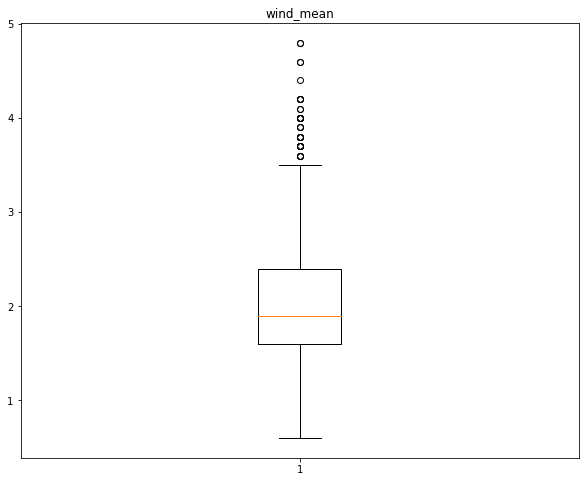

In [16]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('wind_mean')
ax.boxplot(train['wind_mean'])

In [17]:
train.loc[train['wind_mean']>=3.4,'wind_mean']=train['wind_mean'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe33b56a340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe33b56aa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe33b7fcf70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe33b5781c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe33b578550>],
 'means': []}

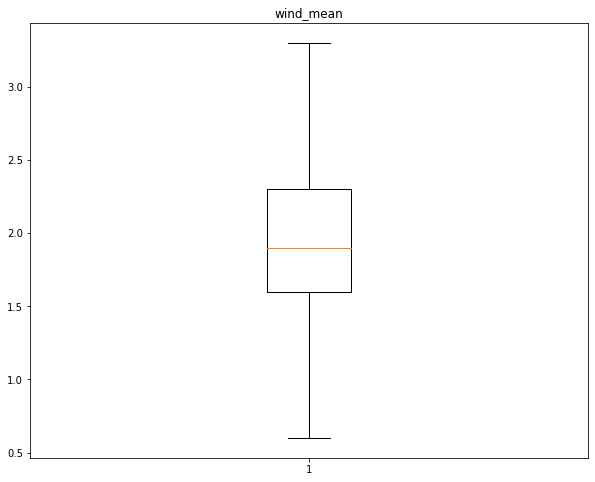

In [18]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('wind_mean')
ax.boxplot(train['wind_mean'])

In [19]:
train['wind_max'].describe()

count    1095.000000
mean        4.359635
std         1.186847
min         1.600000
25%         3.500000
50%         4.200000
75%         5.000000
max         9.800000
Name: wind_max, dtype: float64

In [20]:
train.loc[train['wind_max']>=7,'wind_max']=train['wind_max'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe328e2a9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe328e37100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe328e2a610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe328e37820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe328e37bb0>],
 'means': []}

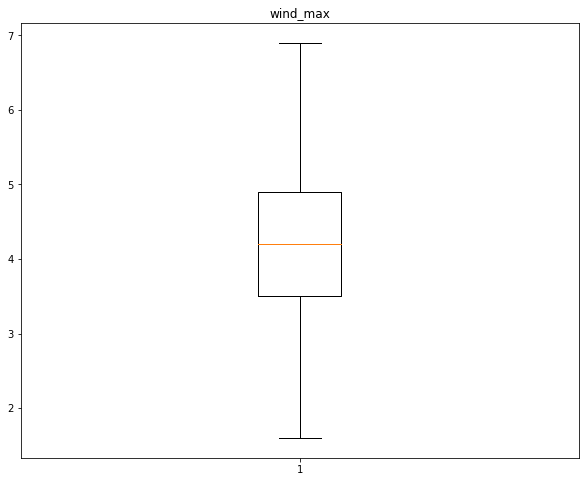

In [21]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('wind_max')
ax.boxplot(train['wind_max'])

In [22]:
test['wind_max'].describe()

count    365.000000
mean       4.808493
std        1.362552
min        2.600000
25%        3.700000
50%        4.600000
75%        5.700000
max       10.600000
Name: wind_max, dtype: float64

In [23]:
test.loc[test['wind_max']>=8.5,'wind_max']=test['wind_max'].mean()

In [24]:
train.loc[train['wind_mean']>=3.4,'wind_mean']=train['wind_mean'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe328ea0400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe328ea0b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe328ea0070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe328ead280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe328ead640>],
 'means': []}

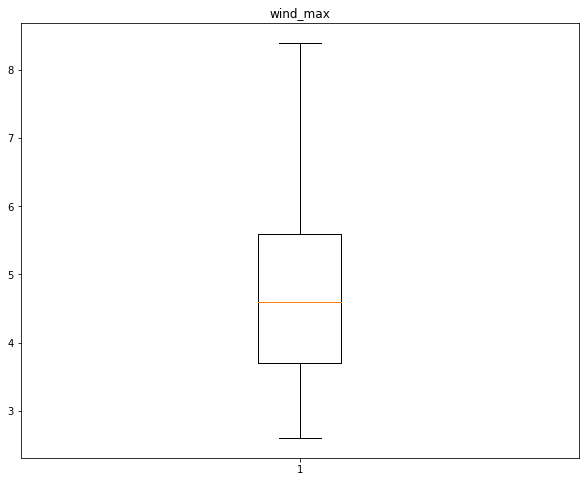

In [25]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('wind_max')
ax.boxplot(test['wind_max'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe31857e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe31857ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe31857e130>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe34885b340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe34885b6d0>],
 'means': []}

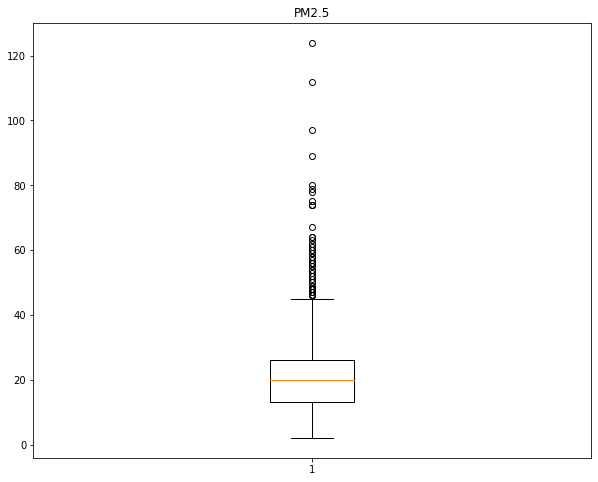

In [26]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('PM2.5')
ax.boxplot(train['PM2.5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe328ef1e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe328f014c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe328ef1ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe328f01be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe328f01f70>],
 'means': []}

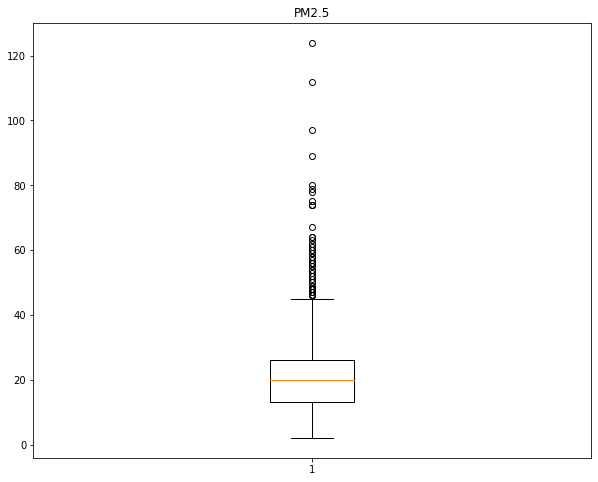

In [27]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('PM2.5')
ax.boxplot(train['PM2.5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3488a3dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3488b6550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3488a3a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3488b6c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3488c2040>],
 'means': []}

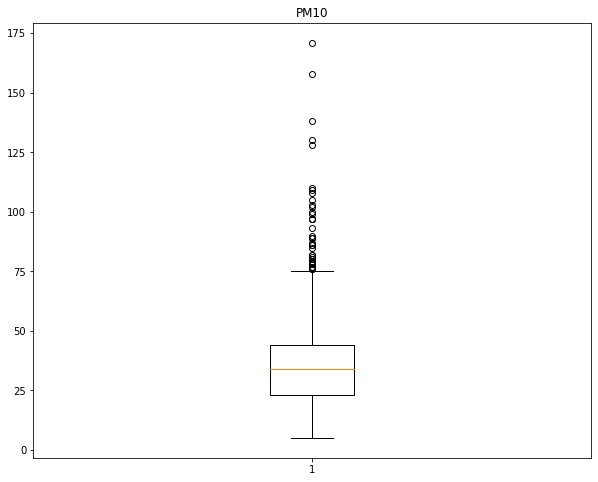

In [28]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('PM10')
ax.boxplot(train['PM10'])

In [29]:
train.loc[train['PM10']>=64,'PM10']=train['PM10'].mean()
train.loc[train['PM2.5']>=34,'PM2.5']=train['PM2.5'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe33b98c610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe33b98cd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe33b98c280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe33b998490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe33b998820>],
 'means': []}

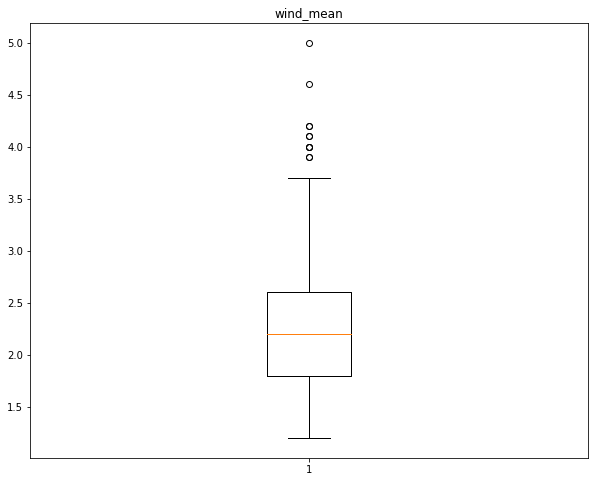

In [30]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('wind_mean')
ax.boxplot(test['wind_mean'])

In [31]:
test.loc[test['wind_mean']>=3.8,'wind_mean']=test['wind_mean'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe32906fdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe329080520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe32906fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe329080c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe329080fd0>],
 'means': []}

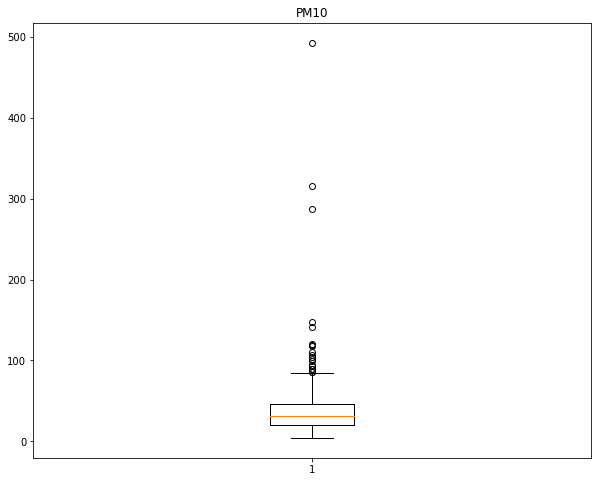

In [32]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('PM10')
ax.boxplot(test['PM10'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3486d6ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3486e91f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3486d6910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3486e98e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3486e9c70>],
 'means': []}

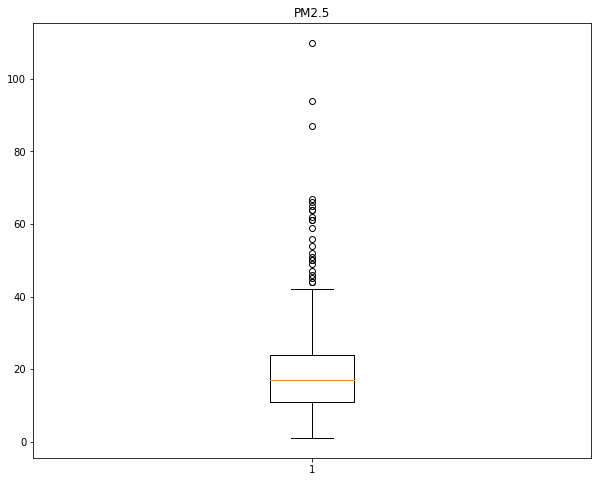

In [33]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.title('PM2.5')
ax.boxplot(test['PM2.5'])

In [34]:
test.loc[test['PM2.5']>=39,'PM2.5']=test['PM2.5'].mean()

In [35]:
test.loc[test['PM10']>=68,'PM10']=test['PM10'].mean()

In [36]:
train.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,temp_diff_info,sweat_info,sweat_info2
0,2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.000000,39.1,8.3,86.5,1.4,3.8,4950,2018,01,01,8.9,148.58,-199.41
1,2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.000000,42.0,7.9,82.3,1.8,4.9,7136,2018,01,02,6.1,75.60,-180.60
2,2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.000000,42.3,8.6,88.7,2.2,3.5,7156,2018,01,03,6.7,-16.92,-300.33
3,2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.000000,43.0,6.2,63.9,1.4,3.5,7102,2018,01,04,8.0,-30.10,-374.10
4,2018-01-05,0.0,-3.0,1.6,-5.6,51.0,21.532619,48.4,8.2,84.5,1.7,3.6,7705,2018,01,05,7.2,77.44,-271.04


In [37]:
test.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,temp_diff_info,sweat_info,sweat_info2,year,month,day
0,2021-01-01,0.0,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,11.4,102.40,-627.20,2021,01,01
1,2021-01-02,0.0,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,7.0,-53.90,-323.40,2021,01,02
2,2021-01-03,0.0,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,7.1,-90.00,-409.50,2021,01,03
3,2021-01-04,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,8.7,15.42,-431.76,2021,01,04
4,2021-01-05,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,7.8,-110.88,-522.72,2021,01,05


In [38]:
train.drop(['date'],axis=1)
test.drop(['date'],axis=1)

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,temp_diff_info,sweat_info,sweat_info2,year,month,day
0,0.0,-4.2,1.6,-9.8,30.0,17.000000,64.0,6.5,67.7,2.0,4.1,11.4,102.40,-627.20,2021,01,01
1,0.0,-5.0,-1.4,-8.4,34.0,12.000000,38.5,9.0,93.8,2.6,5.4,7.0,-53.90,-323.40,2021,01,02
2,0.0,-5.6,-2.0,-9.1,39.0,14.000000,45.0,5.5,56.7,2.0,4.5,7.1,-90.00,-409.50,2021,01,03
3,0.0,-3.5,0.3,-8.4,40.0,23.000000,51.4,4.6,47.4,1.7,3.2,8.7,15.42,-431.76,2021,01,04
4,0.0,-5.5,-2.1,-9.9,30.0,17.000000,52.8,8.6,88.7,2.9,5.7,7.8,-110.88,-522.72,2021,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.000000,60.9,3.8,39.6,1.7,3.1,9.0,-237.51,-785.61,2021,12,27
361,0.0,-4.1,-0.9,-8.5,51.0,38.000000,73.8,1.7,17.7,2.2,3.1,7.6,-66.42,-627.30,2021,12,28
362,0.2,0.4,5.9,-3.8,66.0,20.334247,72.9,1.8,18.8,2.6,5.9,9.7,430.11,-277.02,2021,12,29
363,0.0,-3.9,0.2,-6.8,30.0,17.000000,48.5,7.3,76.0,3.3,6.6,7.0,9.70,-329.80,2021,12,30


In [40]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
numerical_cols = ['temp_diff_info','sweat_info','sweat_info2','precipitation','temp_mean','temp_highest','wind_max','temp_lowest', 'PM10', 'PM2.5', 'humidity' ,'sunshine_sum','sunshine_rate', 'wind_mean']
std.fit(train[numerical_cols])
std.fit(train[numerical_cols])

StandardScaler()

In [59]:
train[numerical_cols] = std.transform(train[numerical_cols])
test[numerical_cols] = std.transform(test[numerical_cols])
train

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,temp_diff_info,sweat_info,sweat_info2
0,-0.292954,-1.393122,-1.357225,-1.342314,0.140665,-0.159416,-1.280371,0.384267,0.921466,-0.975623,-0.445123,4950,2018,01,01,-0.016914,-1.305513,-1.148259
1,-0.292954,-1.440898,-1.546629,-1.267124,0.299486,0.563914,-1.095331,0.283363,0.793470,-0.235184,0.657011,7136,2018,01,02,-0.971948,-1.402080,-1.122266
2,-0.292954,-1.717999,-1.754974,-1.530288,-0.097566,0.129916,-1.076189,0.459944,0.988511,0.505254,-0.745705,7156,2018,01,03,-0.767298,-1.524501,-1.287718
3,-0.292954,-1.717999,-1.783385,-1.680667,0.537717,0.853246,-1.031524,-0.145477,0.232729,-0.975623,-0.745705,7102,2018,01,04,-0.323889,-1.541940,-1.389659
4,-0.292954,-1.555561,-1.565570,-1.389308,1.490641,0.496300,-0.686966,0.359041,0.860516,-0.420294,-0.645511,7705,2018,01,05,-0.596756,-1.399645,-1.247243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,-0.292954,-0.714703,-0.770071,-0.731399,0.303580,0.496300,0.238236,-0.221155,0.159589,-0.235184,-1.447064,37103,2020,12,27,-0.119239,-0.669828,-0.751013
1091,-0.183892,-0.628706,-0.637488,-0.468235,0.303580,0.496300,0.825261,0.308589,0.823946,-0.975623,-1.146481,46912,2020,12,28,-0.596756,-0.414532,-0.454242
1092,-0.276175,-1.259349,-1.309874,-1.445700,0.303580,0.496300,0.742312,-1.709482,-1.714627,1.801022,1.859339,35747,2020,12,29,0.528819,-1.099281,-1.479287
1093,-0.292954,-2.310421,-2.304247,-2.075412,0.537717,-0.448748,-0.233936,0.384267,0.921466,0.160223,1.959533,22488,2020,12,30,-0.767298,-1.957421,-1.862052


In [41]:
train=train.drop(['date'],axis=1)

In [42]:
test=test.drop(['date'],axis=1)

In [60]:
test.sample(5)

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,temp_diff_info,sweat_info,sweat_info2,year,month,day
146,0.453700,0.240817,0.053838,0.443438,0.775948,-0.159416,1.520758,-1.583353,-1.611012,1.615912,0.957593,-1.415356,0.551607,0.721566,2021,05,27
227,-0.292954,1.339665,1.389138,1.251726,-1.209311,-0.882746,0.123384,0.914010,0.616715,0.690364,-0.545317,0.460603,1.149661,1.027029,2021,08,16
82,-0.292954,-0.236943,-0.116626,-0.327255,2.602386,1.287244,0.148906,0.283363,0.241872,0.875473,1.057787,0.767578,-0.126858,-0.388285,2021,03,24
73,-0.150334,-0.256053,-0.230269,-0.383647,0.511392,0.322936,0.614698,-1.028383,-1.022843,0.875473,0.857399,0.562928,-0.072858,-0.387829,2021,03,15
223,-0.292954,1.291889,1.284966,1.392707,-0.018156,1.142578,0.506226,-0.599543,-0.736378,-0.235184,0.356429,-0.426214,1.312400,1.352668,2021,08,12


In [61]:
train.sample(5)

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,temp_diff_info,sweat_info,sweat_info2
757,-0.292954,-0.695592,-0.807952,-0.562222,-1.209311,-1.316744,-0.814580,-0.927480,-0.788185,0.320145,-0.645511,37990,2020,01,29,-0.869623,-0.912712,-0.667520
944,8.314536,1.119896,0.773574,1.383308,-1.288721,-1.027412,2.369391,-1.709482,-1.714627,1.986131,0.115597,17575,2020,08,03,-2.233956,1.849111,2.307776
453,-0.141945,-0.772034,-0.921595,-0.534026,0.061255,0.274582,0.818880,-0.952706,-0.983226,1.801022,2.059727,14001,2019,03,30,-1.381248,-0.701849,-0.524468
433,-0.292954,-0.303829,-0.268150,-0.233268,0.303580,0.496300,-2.090720,-1.633805,-1.635392,-1.345842,-1.346869,31050,2019,03,10,-0.119239,-0.967651,-0.628275
1075,-0.292954,-1.049135,-1.139410,-0.891177,1.887693,0.496300,-0.501925,0.459944,1.015938,0.320145,0.556817,42146,2020,12,12,-0.869623,-1.088047,-0.893967


from sklearn.preprocessing import StandardScaler
std = StandardScaler()
numerical_cols = ['precipitation','temp_mean','temp_highest','temp_lowest', 'PM10', 'PM2.5', 'humidity' ,'sunshine_sum','sunshine_rate', 'wind_mean','wind_max','temp_diff_info','sweat_info','sweat_info2']
std.fit(train[numerical_cols])
std.fit(test[numerical_cols])

train[numerical_cols] = std.transform(train[numerical_cols])
test[numerical_cols] = std.transform(test[numerical_cols])
train

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_state = 42
#from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

X_feature = train.drop(['rental'], axis = 1)
y_target = train['rental']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size = 0.3, shuffle = True)

In [47]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [64]:
X_train

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day,temp_diff_info,sweat_info,sweat_info2
1,-0.292954,-1.440898,-1.546629,-1.267124,0.299486,0.563914,-1.095331,0.283363,0.793470,-0.235184,0.657011,2018,01,02,-0.971948,-1.402080,-1.122266
374,-0.292954,-1.326236,-1.432987,-1.285922,1.728872,1.576576,-0.661443,-0.927480,-0.751615,-1.160732,-0.445123,2019,01,10,-0.494431,-1.308398,-1.176159
265,-0.292954,0.584804,0.678872,0.603216,-0.494618,-1.172078,-0.399834,0.157234,0.150447,-0.605403,0.055847,2018,09,23,0.255953,0.268802,0.267676
315,-0.292954,-0.494933,-0.287090,-0.571621,-0.415208,-0.593414,-0.438118,0.535622,0.918418,-1.345842,-0.946093,2018,11,12,1.040445,-0.457152,-0.648657
549,-0.292954,1.158117,1.389138,1.016759,-0.335797,-0.159416,0.027673,1.494206,0.918418,-0.050075,0.256235,2019,07,04,1.313311,1.084560,0.774492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,-0.292954,-1.746665,-1.773914,-1.633674,0.220075,0.563914,-0.616778,0.182460,0.665475,0.320145,0.055847,2019,01,01,-0.460322,-1.541411,-1.433602
697,-0.292954,-0.877141,-0.836363,-0.994562,0.934769,0.496300,-1.057047,-0.372510,-0.065926,-0.420294,-0.845899,2019,11,30,0.597036,-0.977892,-0.955115
221,-0.292954,1.664542,1.767947,1.552484,-1.447542,-1.316744,0.110622,1.166269,0.802613,-0.975623,-0.645511,2018,08,10,0.733470,1.463310,1.290110
536,-0.276175,0.842795,0.754634,0.960366,-0.653439,-0.448748,0.876307,-0.851802,-1.013701,-0.420294,-0.545317,2019,06,21,-0.767298,1.015503,1.081627


In [65]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)

s_lr = NMAE(y_test, lr_pred)

In [66]:
rf_reg = RandomForestRegressor() 
rf_reg.fit(X_train,y_train) 
rf_pred = rf_reg.predict(X_test)

s_rf = NMAE(y_test, rf_pred)

In [67]:
gbm_reg = GradientBoostingRegressor(n_estimators=4000)
gbm_reg.fit(X_train,y_train)
gbm_pred = gbm_reg.predict(X_test)
s_gbm = NMAE(y_test, gbm_pred)

[0.556713382966119, 0.19288926263953446, 0.19964835633610548]


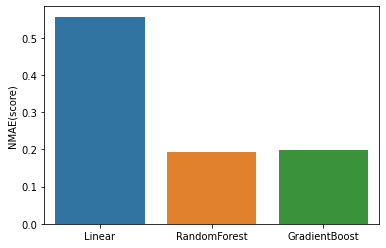

In [76]:
list_scores = [s_lr,s_rf, s_gbm]
list_regressors = ['Linear','RandomForest', 'GradientBoost']
sns.barplot(x=list_regressors, y=list_scores)
plt.ylabel('NMAE(score)')
print(list_scores)

In [68]:
test

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,temp_diff_info,sweat_info,sweat_info2,year,month,day
0,-0.292954,-1.670223,-1.565570,-1.784053,-0.176976,-0.159416,0.308424,-0.069799,0.348535,0.135035,-0.144541,0.835795,-1.366618,-1.739411,2021,01,01
1,-0.292954,-1.746665,-1.849676,-1.652471,0.140665,-0.882746,-1.318655,0.560848,1.143934,1.245693,1.157981,-0.664973,-1.573432,-1.319598,2021,01,02
2,-0.292954,-1.803996,-1.906498,-1.718262,0.537717,-0.593414,-0.903910,-0.322058,0.013309,0.135035,0.256235,-0.630864,-1.621199,-1.438577,2021,01,03
3,-0.292954,-1.603337,-1.688683,-1.652471,0.617127,0.708580,-0.495545,-0.549091,-0.270109,-0.420294,-1.046287,-0.085131,-1.481709,-1.469338,2021,01,04
4,-0.292954,-1.794441,-1.915968,-1.793451,-0.176976,-0.159416,-0.406215,0.459944,0.988511,1.801022,1.458563,-0.392106,-1.648828,-1.595033,2021,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.292954,-1.995100,-2.086432,-2.075412,0.061255,0.274582,0.110622,-0.750898,-0.507815,-0.420294,-1.146481,0.017194,-1.816383,-1.958313,2021,12,27
361,-0.292954,-1.660668,-1.802325,-1.661870,1.490641,2.878571,0.933733,-1.280642,-1.175219,0.505254,-1.146481,-0.460322,-1.589999,-1.739549,2021,12,28
362,-0.276175,-1.230684,-1.158350,-1.220131,2.681796,0.322936,0.876307,-1.255416,-1.141696,1.245693,1.658951,0.255953,-0.932996,-1.255507,2021,12,29
363,-0.292954,-1.641557,-1.698153,-1.502092,-0.176976,-0.159416,-0.680585,0.132008,0.601478,2.541460,2.360309,-0.664973,-1.489278,-1.328442,2021,12,30


In [69]:
rf_reg = RandomForestRegressor() 
rf_reg.fit(X_feature, y_target) 
pred1 = rf_reg.predict(test)
pred1 = np.round(pred1)

In [70]:
pred1

array([ 6364.,  5924.,  5790.,  6475.,  5900.,  5793.,  5573.,  5785.,
        5763.,  5686.,  5879.,  6476.,  7244.,  7596.,  9985.,  6785.,
        5835.,  6286.,  5908.,  6910.,  6652.,  7406., 11234., 12816.,
       13240.,  7261.,  7765.,  6166.,  5731.,  6682.,  8006.,  8225.,
        6278.,  6251.,  6364.,  6948.,  8250.,  7427.,  6533.,  6468.,
        7009.,  9889., 12654., 15292., 14834.,  7211.,  5957.,  5982.,
        6265.,  8217., 14574., 19868., 11078.,  6952., 10270.,  7833.,
       15567., 19447., 10368.,  6877.,  7166., 10178., 12066., 17805.,
       10686., 11979., 12749., 11932., 18225., 19017., 15385., 13735.,
       13827., 16978., 11569., 19440., 20937., 25384., 13415.,  8394.,
       11163., 17532., 19167., 21094., 21540.,  9715.,  8314., 14917.,
       21074., 26966., 28910., 27746., 10160., 20652., 24380., 24741.,
       25258., 24680., 25273., 23404., 24044., 12481., 13179., 13153.,
       21904., 14781., 14611., 16659., 23377., 25437., 30514., 31330.,
      

In [74]:
gbm_reg.fit(X_feature, y_target)
pred = gbm_reg.predict(test)
pred = np.round(pred)

In [75]:
pred

array([   540.,   1561.,  -1067.,    683.,   5593.,   7552.,   4487.,
        13259.,  14036.,  -3612.,  -2683., -10696.,  -2517.,   5758.,
       -12046.,  12358.,   2633.,  -2963.,   9657.,   2357., -12448.,
       -11419.,  -4807.,   3779.,   5607., -10672.,  12915.,  -3308.,
        14346.,    286.,    873.,  -6740.,  10054.,   2172.,  13795.,
         8617., -12492.,   8737.,  17186.,  17373.,   -201.,   4322.,
        18462.,  19559.,   9536.,   7277.,   3014.,  17855.,  18425.,
        15067.,   8620.,  19918.,   8728.,  13084.,  12017.,   1192.,
        11157.,  27817.,   2546.,  -5226.,   -576.,  17397.,   8719.,
        22867.,   8943.,  19955.,  25127.,  12388.,  23244.,  16408.,
        11546.,   8947.,  17066.,  12257.,  18360.,  25222.,  24929.,
        24514.,  -2643.,   4720.,  26975.,  22112.,  13376.,  22968.,
        24930.,    849.,    814.,  21259.,  25485.,  30723.,  30629.,
        16155., -15937.,  11709.,  35806.,  29073.,  29916.,  30554.,
        32146.,  266

submission['rental'] = pred
submission.to_csv('gbm_change2.csv', index = False)

In [73]:
rf_reg.fit(X_feature, y_target)
pred = rf_reg.predict(test)
pred = np.round(pred)

In [ ]:
submission['rental'] = pred
submission.to_csv('GBM_cg3.csv', index = False)